In [12]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


df = pd.read_csv("../dataset/1-CombinedDataset.csv", index_col=0)

In [13]:
df['mnth_sin'] = df['DATE'].apply(lambda x: np.sin((int(x[5:7])-1)*(2.*np.pi/12)))
df['mnth_cos'] = df['DATE'].apply(lambda x: np.cos((int(x[5:7])-1)*(2.*np.pi/12)))


df['DATE'] = pd.to_datetime(df['DATE']) 
df['DATE_DELTA'] = (df['DATE'] - df['DATE'].min())  / np.timedelta64(1,'D')

feature_labels =['DATE_DELTA','CAUR', 'Average DGS', 'DFF', 'NASDAQCOM' ,'ZHVI','BofA_Yield_Index_PCH','CA_Consumer_Price_Index','MORT30US','CPI STICKY', 'mnth_sin','mnth_cos']
X = df[feature_labels]
y = df[['FORECLOSURE']]


r2_score: 0.5287966992416007 
    n_estimators = 250
    random_state = 0
    test_size = 23


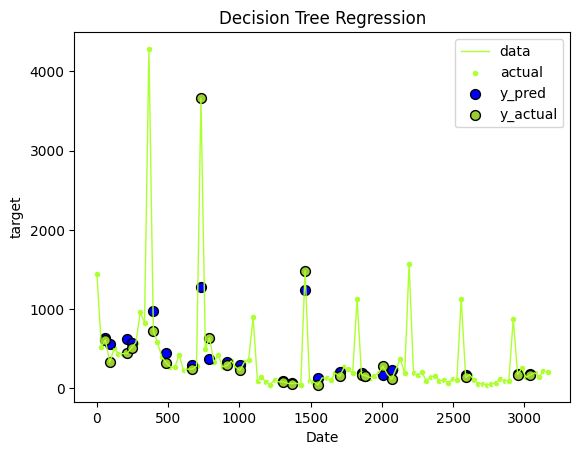

r2_score: 0.9375427490432464 
    n_estimators = 250
    random_state = 1
    test_size = 23


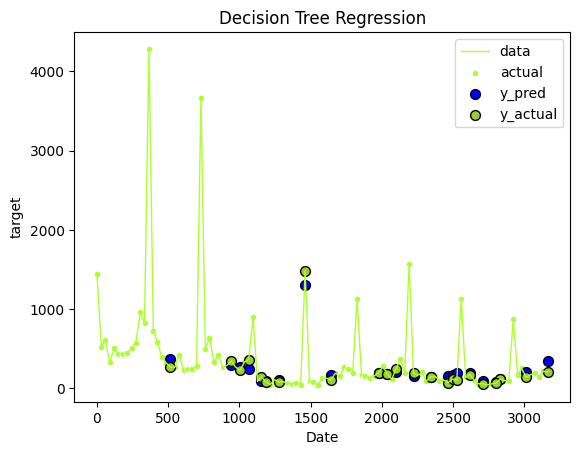

r2_score: 0.5188057484077493 
    n_estimators = 250
    random_state = 2
    test_size = 23


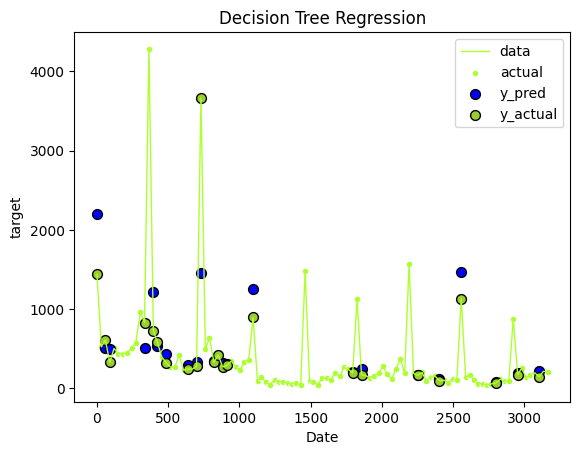

r2_score: 0.7932340133971393 
    n_estimators = 250
    random_state = 3
    test_size = 23


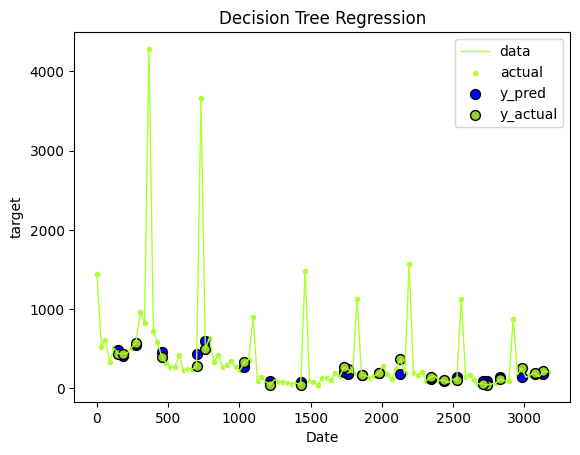

r2_score: 0.5558625612644006 
    n_estimators = 250
    random_state = 4
    test_size = 23


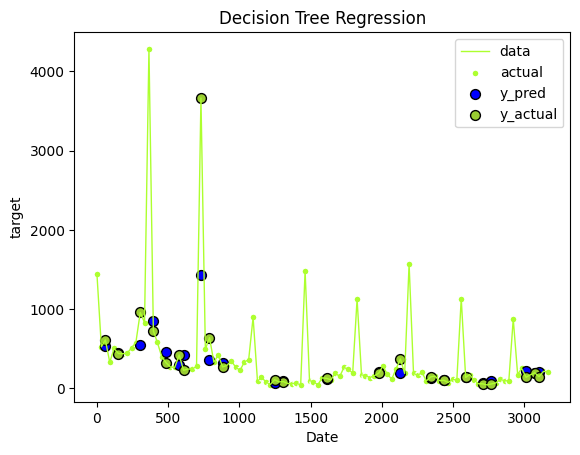

r2_score: 0.6825638165451027 
    n_estimators = 250
    random_state = 5
    test_size = 23


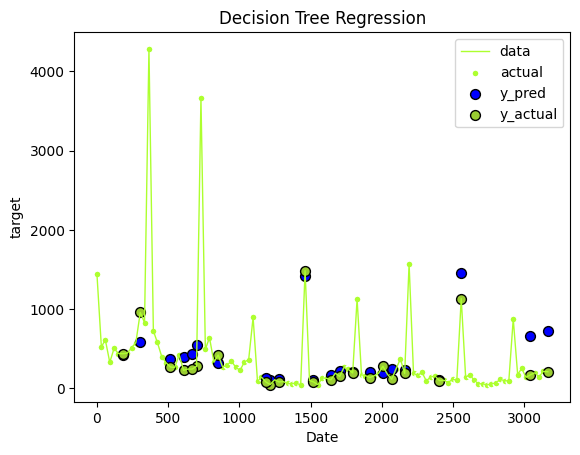

r2_score: 0.5606714667536843 
    n_estimators = 250
    random_state = 6
    test_size = 23


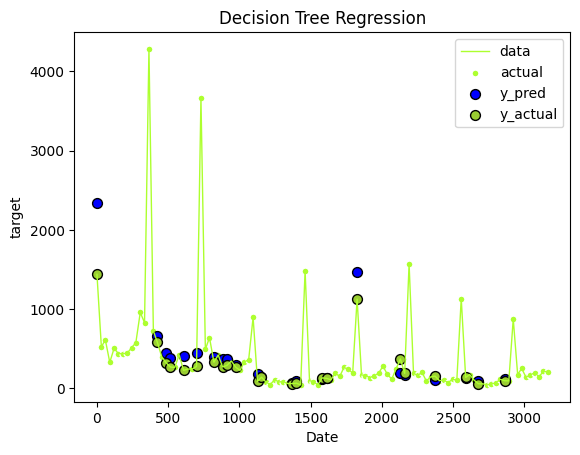

r2_score: 0.4238198086223478 
    n_estimators = 250
    random_state = 7
    test_size = 23


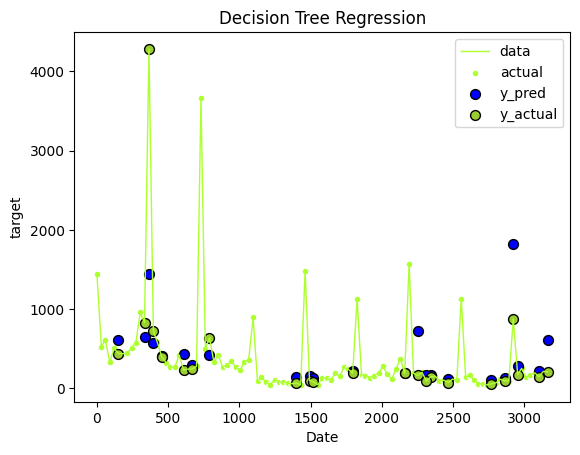

r2_score: 0.43117020387915006 
    n_estimators = 250
    random_state = 8
    test_size = 23


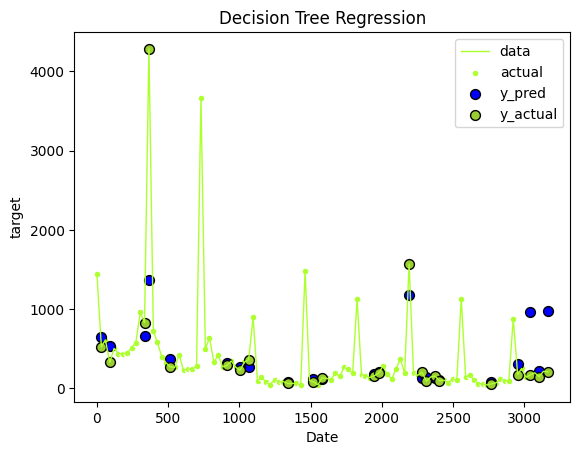

r2_score: 0.8741793428917336 
    n_estimators = 250
    random_state = 9
    test_size = 23


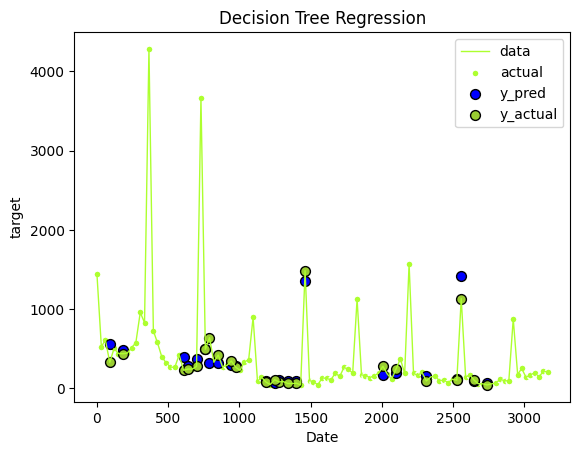

In [14]:
for i in range(0,10):
    n_estimators = 250
    test_size = 23
    random_state=i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    regressor = RandomForestRegressor(n_estimators=n_estimators, max_features=0.8)
    regressor.fit(X_train,y_train.to_numpy().flatten())
    y_pred = regressor.predict(X_test)
    r2 = r2_score(y_test,y_pred)

    print(f"r2_score: {r2} \n\
    n_estimators = {n_estimators}\n\
    random_state = {random_state}\n\
    test_size = {test_size}")
    # Plot the results
    plt.figure()
    plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1, label="data")
    plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow", label="actual")
    plt.scatter(X_test['DATE_DELTA'], y_pred,s=50, edgecolor="black", c="blue", label="y_pred")
    plt.scatter(X_test['DATE_DELTA'], y_test, s=50, edgecolor="black", c="yellowgreen", label="y_actual")

    plt.xlabel("Date")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()

In [ ]:
+